In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("mips.csv", sep=";")

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def saveFig(name):
    plt.savefig("figures/mips_%s.pdf" % name,
                dpi=92,
                #bbox_inches='tight',
                transparent=True)

def plotMIPS(twin, lin=False):
    fig, ax1 = plt.subplots()
    ax1.grid()
    
    ax2 = None
    if twin:
        ax2 = ax1.twinx()
        
    ax1.set_xlabel('Jahr')
    ax1.set_ylabel('Rechenleistung [MIPS]')

    ax1.plot(data.YEAR, data.MIPS, 'x')
    if not lin:
        ax1.semilogy()
        ax1.set_ylim(1e-3, 1e6)

    return ax1, ax2

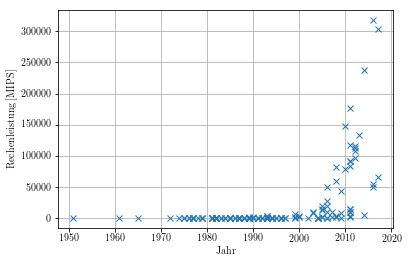

In [11]:
ax1, ax2 = plotMIPS(False, True)
saveFig('linear')


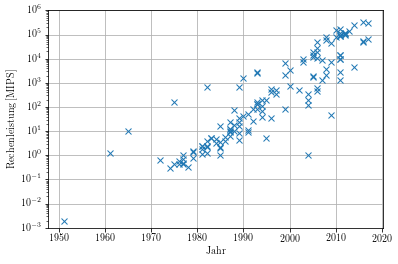

In [13]:
ax1, ax2 = plotMIPS(False)
saveFig('exp')

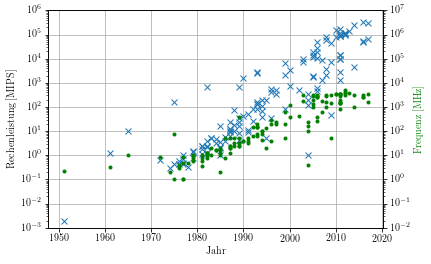

In [14]:
ax1, ax2 = plotMIPS(True)
ax2.semilogy()
my = 1e-2
ax2.set_ylim(my, my*1e9)
ax2.set_ylabel('Frequenz [MHz]', color='g')
ax2.plot(data.YEAR, data.FRQ, 'g.')

saveFig('freq')


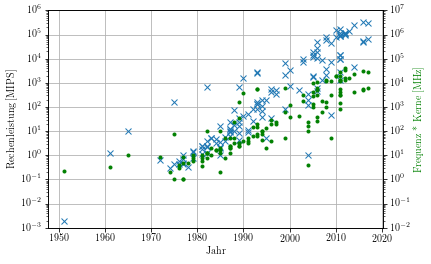

In [15]:
ax1, ax2 = plotMIPS(True)
ax2.semilogy()
my = 1e-2
ax2.set_ylim(my, my*1e9)
ax2.set_ylabel('Frequenz * Kerne [MHz]', color='g')
ax2.plot(data.YEAR, data.FRQ * data.IPS / data.CoreIPS, 'g.')

saveFig('freq_cores')

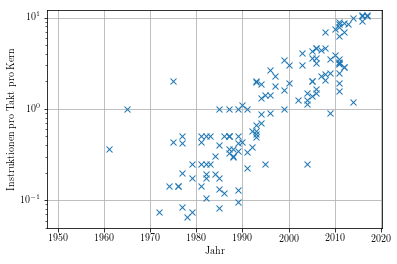

In [16]:
plt.clf()
plt.xlabel("Jahr")
plt.ylabel("Instruktionen pro Takt pro Kern")
plt.plot(data.YEAR, data.CoreIPS, 'x')
plt.grid()
plt.semilogy()

saveFig('ips')

plt.ylim(5e-2, 1.2e1)

saveFig('ips_scaled')
